In [84]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
digit = load_digits()

In [85]:
import matplotlib.pyplot as plt

In [86]:
df = pd.DataFrame(digit.data)
df.shape

(1797, 64)

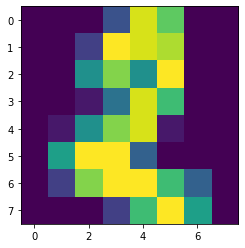

In [90]:
plt.imshow(digit.data[2].reshape(8,8))

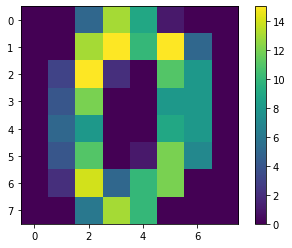

In [92]:
plt.imshow(digit.data[0].reshape(8,8))
plt.colorbar()
plt.show()

In [93]:
digit.data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [94]:
y = digit.target
y.shape

(1797,)

In [95]:
df.max().max()

16.0

In [96]:
df.min().min()

0.0

In [97]:
#bringing to the scale to 0 to 1
X_transformed = digit.data/16.0
X_transformed.shape

(1797, 64)

In [98]:
np.max(X_transformed)

1.0

In [99]:
np.min(X_transformed)

0.0

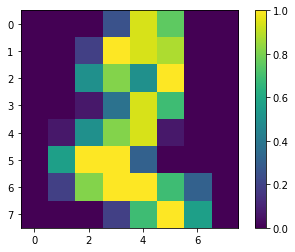

In [100]:
plt.imshow(X_transformed[2].reshape(8,8))
plt.colorbar()
plt.show()

# PCA

In [101]:
from sklearn.decomposition import PCA
pca = PCA()

In [102]:
digit_pca = pca.fit_transform(X_transformed)
digit_pca.shape

(1797, 64)

In [103]:
digit_pca[0]

array([-7.87166531e-02,  1.32968022e+00, -5.91440914e-01,  8.13386793e-01,
       -4.45551424e-01, -4.65041173e-01,  2.03302322e-01,  1.59591897e-01,
       -3.63651339e-02,  2.26606060e-01,  1.61622305e-01,  9.69754425e-02,
        5.34060443e-02, -2.08671834e-01,  3.69161855e-01,  1.71474587e-01,
        2.62398067e-02, -5.61343558e-02,  4.39131791e-02, -2.16382417e-01,
        1.67553099e-01,  6.30905941e-02,  1.25606423e-01,  8.09571742e-02,
        7.36799207e-02,  1.43786366e-01,  2.29420067e-01, -5.89793063e-02,
       -7.07813721e-02,  1.47487219e-01, -1.13586621e-01, -4.71885178e-02,
        1.01776131e-02, -1.32061087e-01,  6.84264491e-02,  1.22303458e-02,
       -5.62460081e-03, -1.72733792e-01,  6.80552010e-02,  1.28752505e-02,
        1.06531958e-01,  3.63323987e-02,  4.45436495e-02, -1.17524292e-02,
        3.92695877e-02, -3.71866815e-02,  2.98077067e-03, -4.45808794e-02,
       -2.12072004e-02,  2.69371306e-03, -2.63375715e-02, -7.61797452e-03,
       -3.95800856e-03, -

In [104]:
X_transformed[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [105]:
np.round(pca.explained_variance_ratio_,2)

array([0.15, 0.14, 0.12, 0.08, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [106]:
np.sum(pca.explained_variance_ratio_)

1.0

In [112]:
pca = PCA(n_components=15)
digit_pca = pca.fit_transform(X_transformed)
digit_pca.shape

(1797, 15)

In [113]:
np.sum(pca.explained_variance_ratio_)

0.8353012130160804

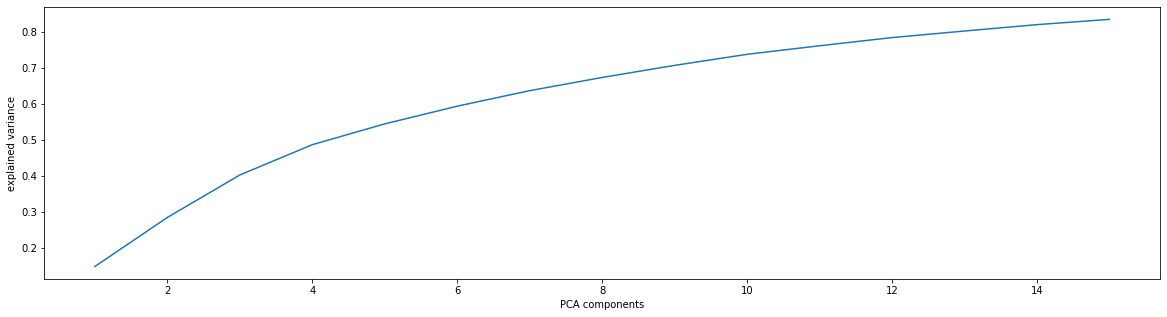

In [115]:
plt.figure(figsize=(20,5))
plt.plot(range(1,16), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA components")
plt.ylabel("explained variance")
plt.show()